C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


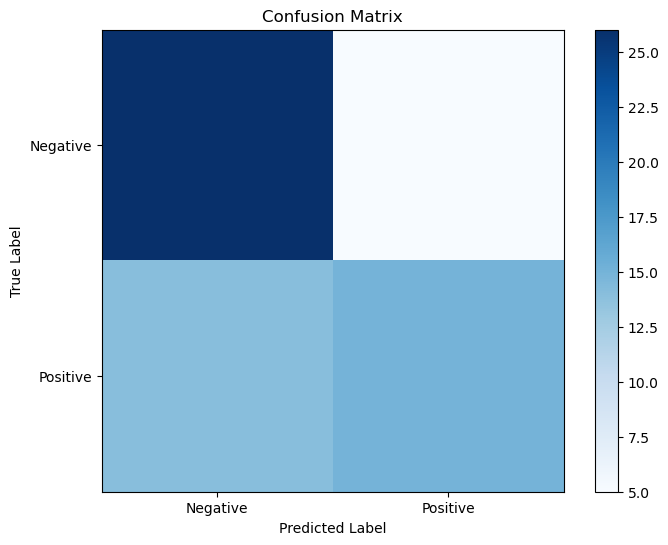

Accuracy: 0.6833333333333333
Precision: 0.75
Recall: 0.5172413793103449
F1 Score: 0.6122448979591838


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("heart_tidy.csv")
df = df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'],axis=1)

# Assuming 'data' is your dataframe containing the dataset
X = df.drop('HeartDiseasePresent', axis=1)  # Features
y = df['HeartDiseasePresent']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the first model (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set using the first model
rf_pred = rf.predict(X_test)

# Train the second model (Logistic Regression) using the predictions of the first model as features
lr = LogisticRegression(random_state=42)
lr.fit(X_test, rf_pred)  # Using the predictions of the first model as features

# Make predictions on the testing set using the second model
lr_pred = lr.predict(X_test)

# Train the third model (KNN) using the predictions of the second model as features
knn = KNeighborsClassifier()
knn.fit(X_test, lr_pred)  # Using the predictions of the second model as features

# Make predictions on the testing set using the third model
knn_pred = knn.predict(X_test)

# Evaluate the performance of the cascaded model
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
